# **Importation de quelques bibliothèques utiles**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Chargement de la base de données**

In [2]:
#importation de la base dans le répertoire de travail
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [3]:
#chargement de la base de données
data = pd.read_csv(filepath_or_buffer="diamonds.csv" , sep =",")

#apperçu
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Renommage des variabels de la base
data.columns = ['id', 'carat', 'cut', 'color', 'clarity', 'depth_total', 'table',
       'price', 'length', 'width', 'depth']
#Apperçu
data.head()

,id,carat,cut,color,clarity,depth_total,table,price,length,width,depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Analyse Exploratoire**

## **Analyse de forme**

- Nous disposons d'une base de données de **53 940** observation et **11** variables (y compris la variable **`id`** qui joue un rôle d'identifiant).
- La variable cible est **price** d'après la description de la base.
- Elle comporte **8 variables quantitatives** et **3 variables qualitatives ordinales**.
- Ladite base de données ne contient de pas de valeur manquantes.
- L'analyse des données dupliquées sans la variable **`id`** montre qu'il y a **146 lignes dupliquées**.

In [5]:
#Modalités et valeurs uniques
data.nunique()

id             53940
carat            273
cut                5
color              7
clarity            8
depth_total      184
table            127
price          11602
length           554
width            552
depth            375
dtype: int64

In [6]:
#informations de la base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           53940 non-null  int64  
 1   carat        53940 non-null  float64
 2   cut          53940 non-null  object 
 3   color        53940 non-null  object 
 4   clarity      53940 non-null  object 
 5   depth_total  53940 non-null  float64
 6   table        53940 non-null  float64
 7   price        53940 non-null  int64  
 8   length       53940 non-null  float64
 9   width        53940 non-null  float64
 10  depth        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
#Analyse des données manquantes
data.isna().sum()

id             0
carat          0
cut            0
color          0
clarity        0
depth_total    0
table          0
price          0
length         0
width          0
depth          0
dtype: int64

In [8]:
#Analyse des données dupliquées sans la variable `id`
data.drop('id' , axis = 1).duplicated().sum()

146

## **Analyse de fond**

- Analyse Univariée

 - Les variables numériques n'ont pas la même échelle, nous songerons à les normaliser avant modélisation.
 - Nous observons des outliers dans toutes les variables numériques. Nous les traiterons avant modélisation.
 - Toutes les variables catégorielles de la base sont ordinales non encodées. Nous songerons à les encoder de manière ordinale.

- Analyse Bivariée
 - Les variables **carat** , **length**, **width**, **depth** sont très corrélées à la variable cible. Par contre, **table** et **depth_total** seront écartées de la modélisation car elles ne sont pas corrélées à la variable cible.
  - Toutes les variables catégoritelles sont liées à la variable cible.
  - Ainsi nous retiendrons les variables suivantes pour la mosélisaion : **carat** , **length**, **width**, **depth** , **cut** , **clarity** et **color**.

### **Préliminaires**

In [9]:
#liste des variables quantitatives
numCols = data.drop("id" , axis = 1).select_dtypes(include = np.number).columns.tolist()
numCols

['carat', 'depth_total', 'table', 'price', 'length', 'width', 'depth']

In [10]:
#liste des variables catégorielles ordinales
catCols = data.select_dtypes(exclude = np.number).columns.tolist()
catCols

['cut', 'color', 'clarity']

### **Analyse univariée**

In [11]:
#Statisques descriptives des variables numériques
data[numCols].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth_total,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
length,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
width,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
depth,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


Les diamants ont un prix moyen de **3932.79 USD** et le plus cher coûte **18823 USD**.

In [12]:
#Statisques descriptives des variables catégorielles
data[catCols].describe().T

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


In [13]:
numCols

['carat', 'depth_total', 'table', 'price', 'length', 'width', 'depth']

<Figure size 500x300 with 0 Axes>

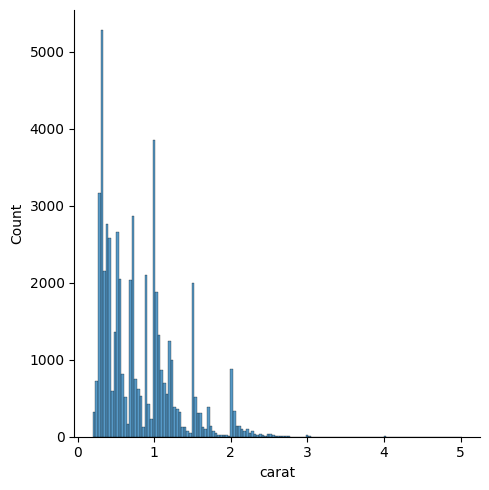

<Figure size 500x300 with 0 Axes>

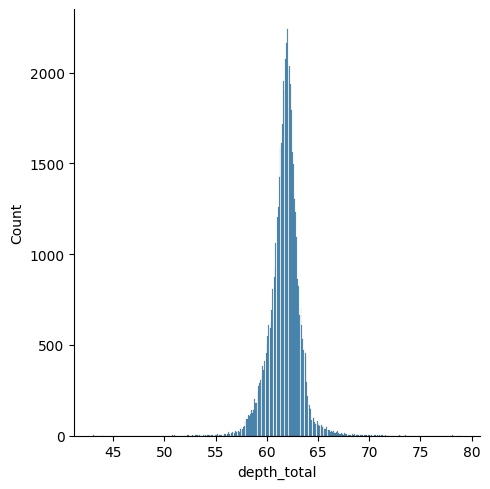

<Figure size 500x300 with 0 Axes>

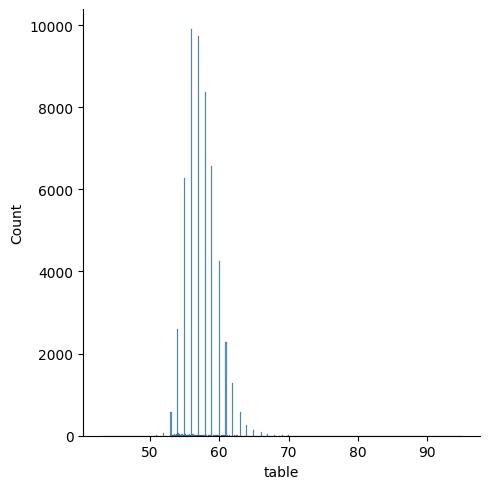

<Figure size 500x300 with 0 Axes>

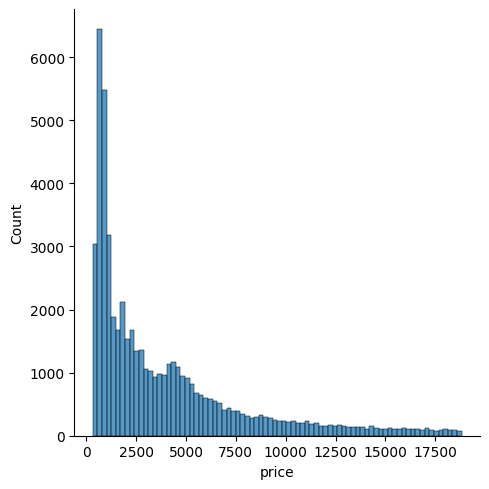

<Figure size 500x300 with 0 Axes>

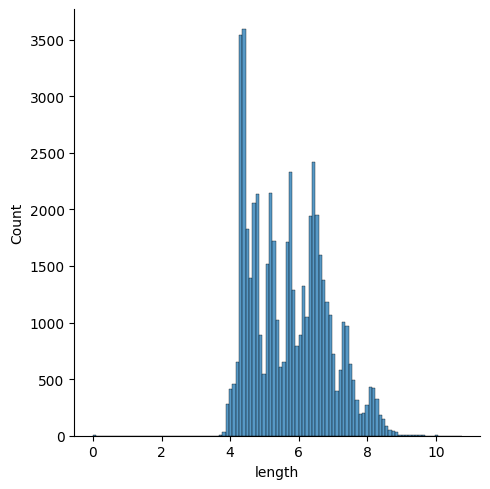

<Figure size 500x300 with 0 Axes>

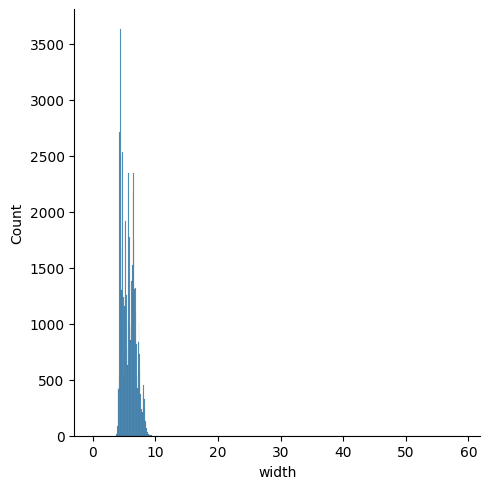

<Figure size 500x300 with 0 Axes>

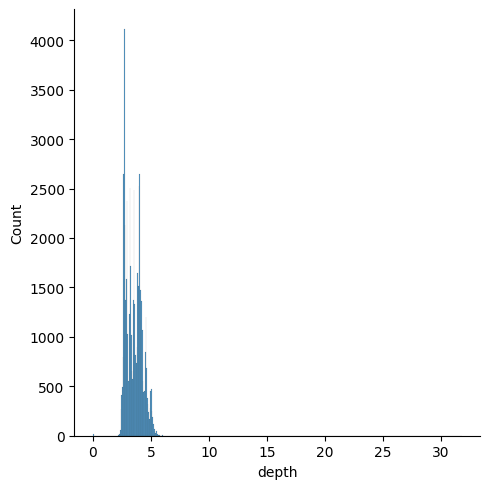

In [14]:
#Distribution des variales quantitatives
for numCol in numCols :
  plt.figure(figsize = (5, 3))
  sns.displot(data = data , x = numCol)
  plt.show()

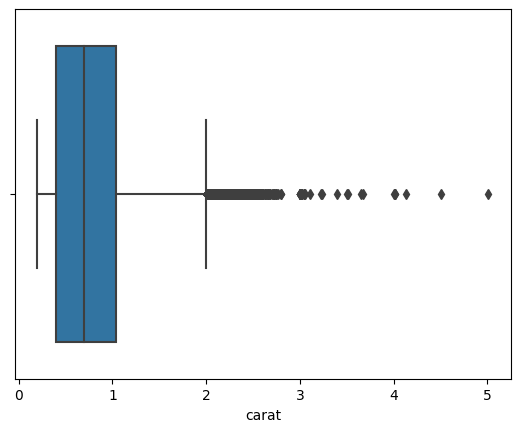

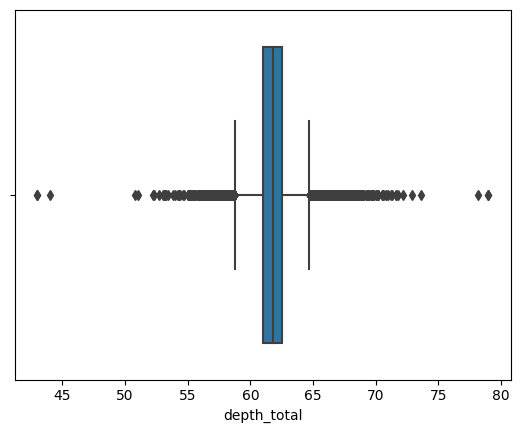

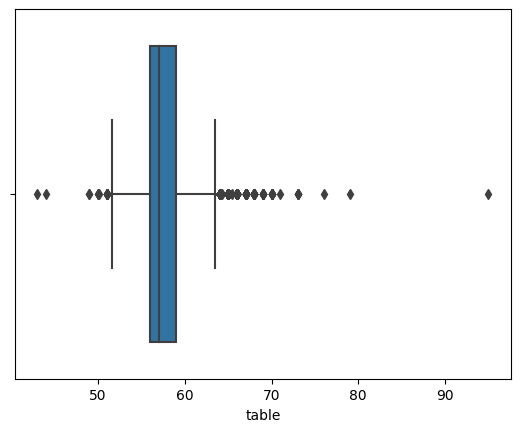

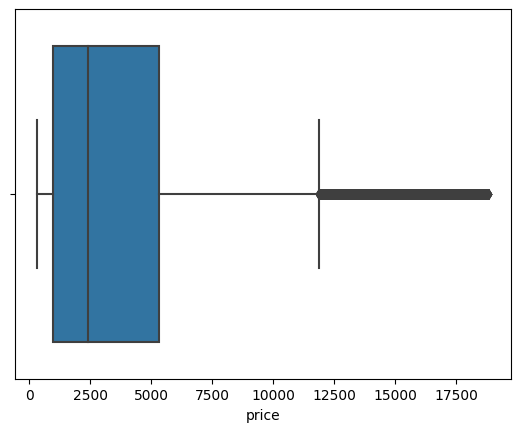

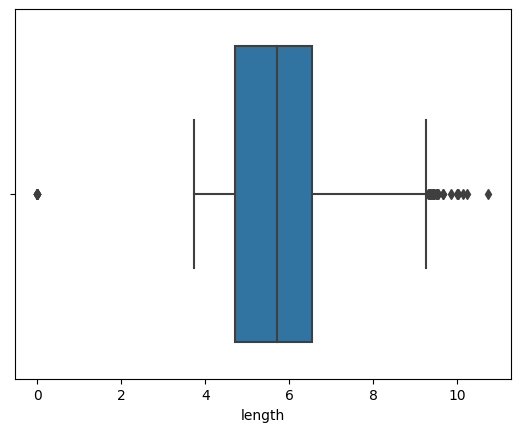

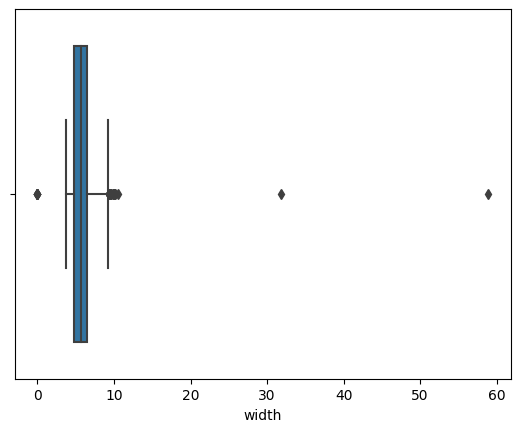

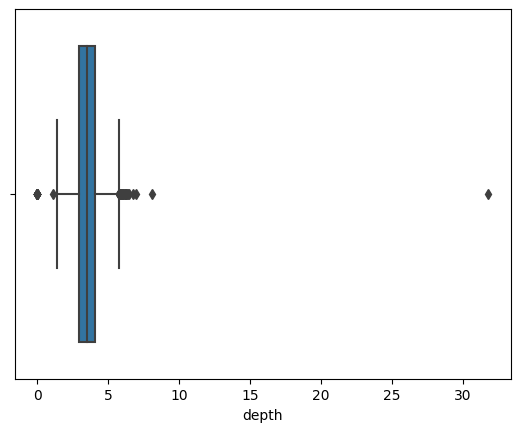

In [15]:
#analyse des outliers (valeur abérrantes) - BoxPlot
for numCol in numCols :
  plt.figure()
  sns.boxplot(data = data , x = numCol)
  plt.show()

### **Analyse bivariée**

<Axes: >

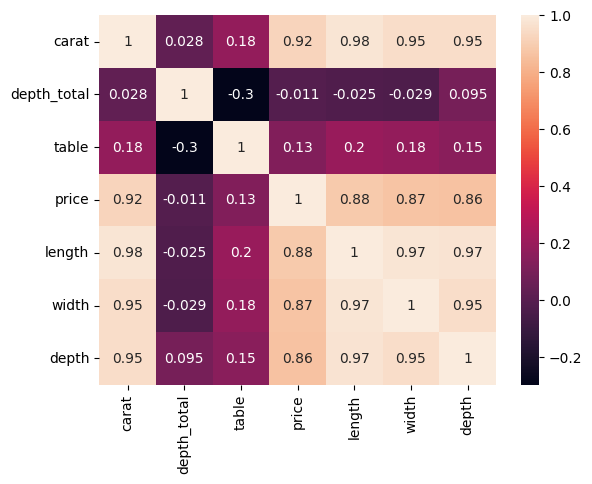

In [16]:
# relation entre variable cible et variable numérique
sns.heatmap(data[numCols].corr() , annot = True)

<Axes: >

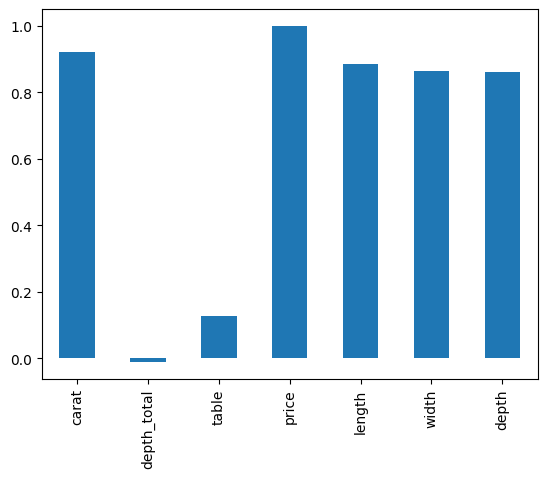

In [17]:
#Diagramme en barre pour mieux voir la corrélation entre variables cible et numériques
data[numCols].corr()["price"].plot.bar()

<Axes: xlabel='cut', ylabel='price'>

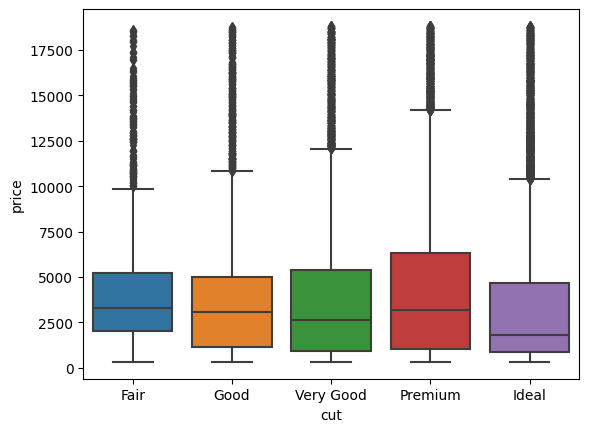

In [18]:
#relation entre variable cible (price) et cut
sns.boxplot(data = data , y = "price" , x = "cut" , order = ["Fair", "Good", "Very Good", "Premium", "Ideal"])

<Axes: xlabel='cut', ylabel='price'>

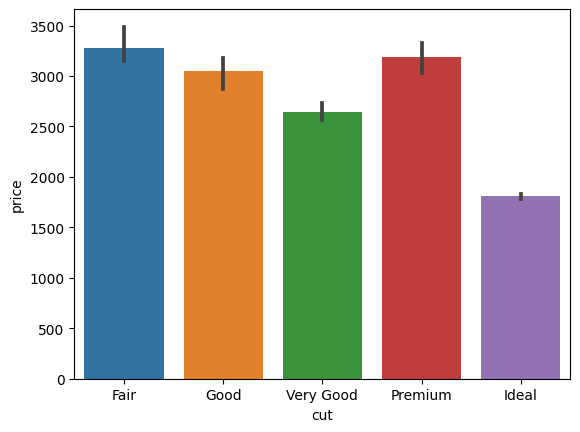

In [19]:
# relation entre variable cible (price) et cut
# diagramme en barre
sns.barplot(data = data , y = "price" , x = "cut" , estimator = "median" , order = ["Fair", "Good", "Very Good", "Premium", "Ideal"])

<Axes: xlabel='clarity', ylabel='price'>

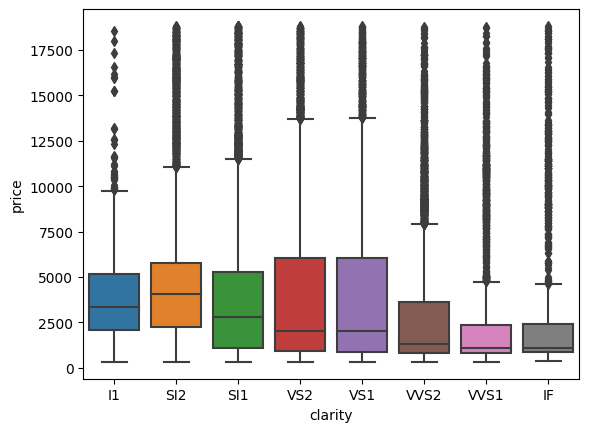

In [20]:
#relation entre variable cible (price) et clarity
sns.boxplot(data = data , y = "price" , x = "clarity" , order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])

<Axes: xlabel='color', ylabel='price'>

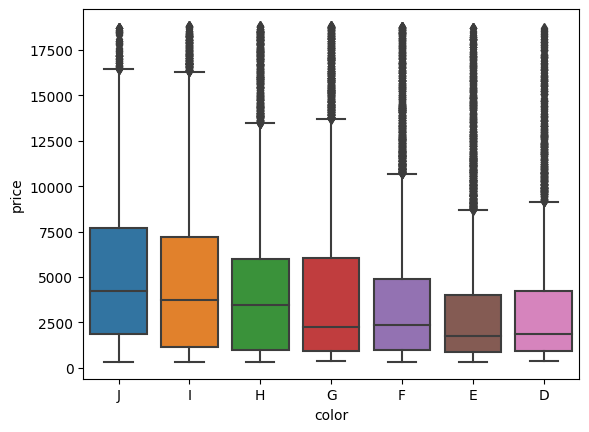

In [21]:
# relation entre variable cible (price) et color
sns.boxplot(data = data , y = "price" , x = "color" , order = ["J", "I", "H", "G", "F", "E", "D"])

**Hypothèse** : Les variables qualitatives sont corrélées à la variable cible d'après les graphiques. Nous confirmerons cela à l'aide d'un test statistique (ANOVA).

In [22]:
import statsmodels.api

In [23]:
result = statsmodels.formula.api.ols("price ~ clarity" , data = data).fit()

In [24]:
r = statsmodels.api.stats.anova_lm(result)
r

,df,sum_sq,mean_sq,F,PR(>F)
clarity,7.0,2.330780e+10,3.329686e+09,215.01926,1.919090e-316
Residual,53932.0,8.351653e+11,1.548552e+07,NaN,NaN


In [25]:
r['PR(>F)'][0] < 0.05 #Les deux variables sont dépendantes

True

In [26]:
# définition d'une fonction de test statistique (ANOVA)
def ANOVA(dataframe , var_num , var_qual):
  result = statsmodels.formula.api.ols(f"{var_num} ~ {var_qual}" , data = data).fit()
  r = statsmodels.api.stats.anova_lm(result)
  return r['PR(>F)'][0] < 0.05 #True veut dire que les variables sont dépendantes et False veut dire indépendantes

In [27]:
#Anova
for var in catCols:
  print(f"price et {var} : {ANOVA(data , 'price', var)}")

price et cut : True
price et color : True
price et clarity : True


# **Objectif mesurable**

 - **Objectif** : Développer un modèle de régression linéaire performant capable de prédire le prix d'un diamant
 - **Mesure de performance** : R² (coefficient de détermination)

# **Prétraitement des données**

## **Suppression des lignes dupliquées & des variables jugées inutiles**

In [28]:
#suppression des lignes dupliquées
dfWithoutDuplicates = data.drop("id" , axis = 1).drop_duplicates()
#appreçu
dfWithoutDuplicates.head()

,carat,cut,color,clarity,depth_total,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
#Suppression d'autres variables jugées inutiles
df = dfWithoutDuplicates.drop(["depth_total","table"] , axis = 1)
#apperçu
df.head()

,carat,cut,color,clarity,price,length,width,depth
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [30]:
#Séléction des variables numériques en liste
numCols = df.select_dtypes(include = np.number).drop("price" , axis = 1).columns.tolist()
numCols

['carat', 'length', 'width', 'depth']

In [31]:
#Séléction des variables catégorielles en liste
catCols = df.select_dtypes(exclude = np.number).columns.tolist()
catCols

['cut', 'color', 'clarity']

## **Imputation des valeurs aberrantes (outliers)**

In [32]:
#définition d'une fonction de suppression de valeurs aberrantes
def impute_outliers(dataframe, numVar):
  Q1 = dataframe[numVar].quantile(0.25)
  Q3 = dataframe[numVar].quantile(0.75)
  IQR = Q3 - Q1
  min = Q1 - 1.5*IQR
  max = Q3 + 1.5*IQR
  dataframeOut = dataframe.copy()
  dataframeOut.loc[dataframeOut[numVar] < min , numVar] = min #dataframeOut[numVar].median()
  dataframeOut.loc[dataframeOut[numVar] > max , numVar] = max #dataframeOut[numVar].median()
  return dataframeOut

In [33]:
#suppression des valeurs aberrantes pour les variables numériques
numCols.append("price")
for var in numCols:
  dfWithoutOutliers = impute_outliers(df , var)
numCols.remove("price")

In [34]:
#Dimensions après suppression
dfWithoutOutliers.shape

(53794, 8)

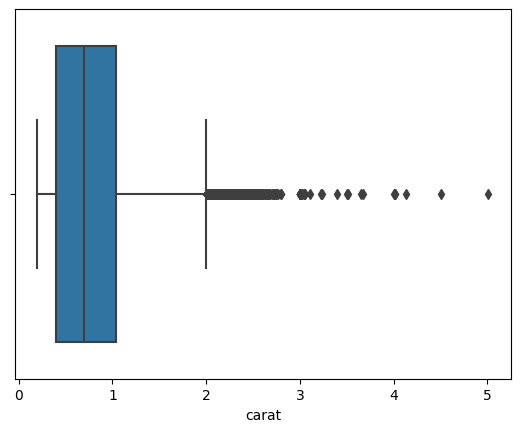

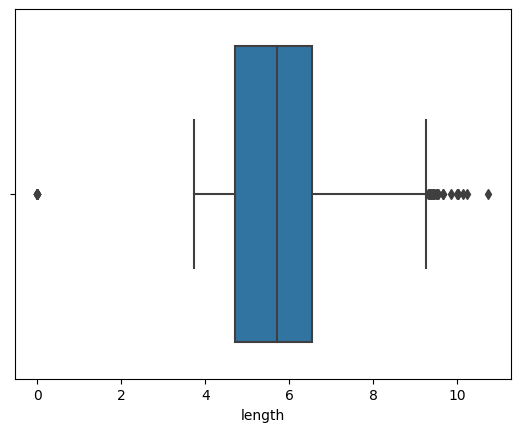

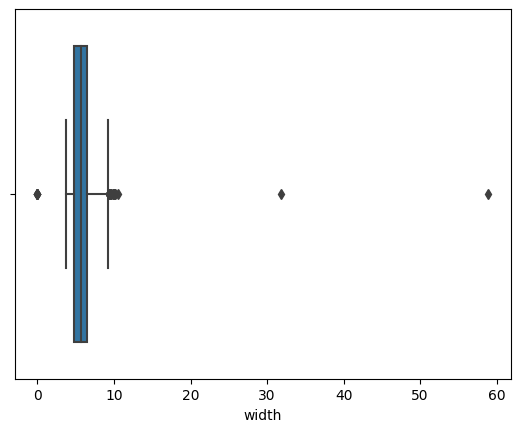

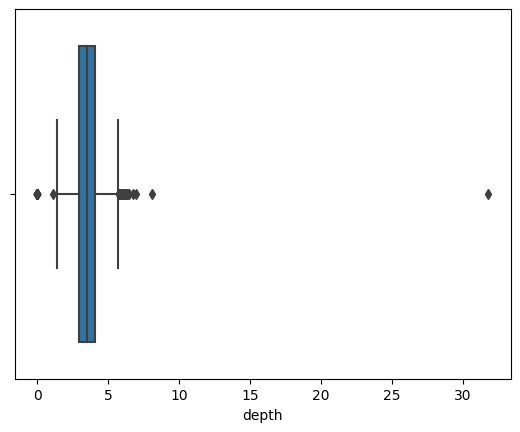

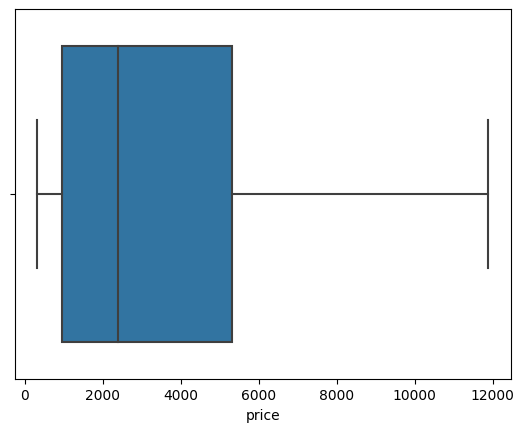

In [35]:
#vérification des outliers pour toutes les variables numériques
numCols.append("price")
for var in numCols:
  plt.figure()
  sns.boxplot(data = dfWithoutOutliers , x = var)
  plt.show()
numCols.remove("price")

## **Encodage des variables catégorielles**

In [36]:
#importation de l'encodeur
from sklearn.preprocessing import OrdinalEncoder

In [37]:
#Liste des variables catégorielles
catCols

['cut', 'color', 'clarity']

In [38]:
#Ordre des modalités de chaque de variable catégorielle
ordreCut = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
ordreColor = ["J", "I", "H", "G", "F", "E", "D"]
ordreClarity = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

In [39]:
#instanciation avec les ordres personnalisés
encoder = OrdinalEncoder(categories = [ordreCut , ordreColor , ordreClarity])

In [40]:
#copy du dataframe
dfEncoded = dfWithoutOutliers.copy()

In [41]:
#encodage ordinal
dfEncoded[catCols] = encoder.fit_transform(dfWithoutOutliers[catCols])

In [42]:
#apperçu
dfEncoded.head()

,carat,cut,color,clarity,price,length,width,depth
0,0.23,4.0,5.0,1.0,326.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,326.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,327.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,334.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,335.0,4.34,4.35,2.75


## **Division de la base en train/test set (70 - 30)**

In [43]:
#Séparation de la variable cible des variables explicatives
X = dfEncoded.drop("price" , axis = 1)
y = dfEncoded["price"]

In [44]:
#importation de la fonction de découpage
from sklearn.model_selection import train_test_split as tts

In [45]:
#Découpage
X_train , X_test , y_train , y_test = tts(X , y , test_size = 0.3 , random_state = 42)

In [46]:
#vérification des dimensions
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_train :", y_train.shape)

Dimensions de X_train : (37655, 7)
Dimensions de y_train : (37655,)


## **Normalisation**

In [47]:
#importation l'algorithme de normalisation
from sklearn.preprocessing import RobustScaler
#instanciation
scaler = RobustScaler()

In [48]:
numCols

['carat', 'length', 'width', 'depth']

In [49]:
#Copie du dataframe
X_train_scaled = X_train.copy()
#Normalisation des variables quantitatives (Données d'entrainement)
X_train_scaled[numCols] = scaler.fit_transform(X_train_scaled[numCols])

In [50]:
#Copie du dataframe
X_test_scaled = X_test.copy()
#Normalisation des variables quantitatives (Données de test)
X_test_scaled[numCols] = scaler.transform(X_test_scaled[numCols])

In [51]:
#apperçu
X_train_scaled.head()

,carat,cut,color,clarity,length,width,depth
45307,-0.615385,4.0,6.0,2.0,-0.771739,-0.769231,-0.778761
15892,0.476923,4.0,3.0,3.0,0.413043,0.395604,0.389381
22182,0.476923,3.0,6.0,5.0,0.331522,0.357143,0.371681
48310,-0.692308,4.0,4.0,3.0,-0.891304,-0.895604,-0.902655
32731,-0.600000,3.0,4.0,3.0,-0.739130,-0.780220,-0.743363


In [52]:
#apperçu
X_test_scaled.head()

,carat,cut,color,clarity,length,width,depth
43657,0.015385,0.0,0.0,3.0,-0.038043,-0.098901,0.079646
4274,0.307692,2.0,5.0,1.0,0.239130,0.258242,0.203540
47412,-0.200000,4.0,3.0,4.0,-0.217391,-0.208791,-0.203540
44437,-0.292308,3.0,5.0,3.0,-0.336957,-0.335165,-0.309735
13975,0.753846,4.0,1.0,2.0,0.597826,0.609890,0.628319


# **Modélisation**

## **Entraînement standard**

In [53]:
#importation de la métrique (R² Score)
from sklearn.metrics import r2_score

In [54]:
#imporation de la fonction time
from time import time

In [55]:
#Définition de fonction
def modelisation(ModelsList , X_train_scaled , y_train , X_test_scaled , y_test ):
  scores = []
  for mod in ModelsList :
    try :
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    model.fit(X_train_scaled , y_train) #entrainement
    fin = time() #calcul du temps de fin
    y_pred_train = model.predict(X_train_scaled) #calcul des prédictions par rapport aux données d'entrainement
    y_pred_test = model.predict(X_test_scaled) #calcul des prédictions par rapport aux données de test
    scores.append({"Modeles" : type(model).__name__ ,
                   "temps_apprentissage" : fin - debut,
                   "r2_train_score" : r2_score(y_train , y_pred_train) ,
                   "r2_test_score" : r2_score(y_test , y_pred_test)})
  return pd.DataFrame(scores)

In [56]:
  # importation des algorithmes
  from sklearn.linear_model import LinearRegression
  from sklearn.neighbors import KNeighborsRegressor
  from sklearn.svm import SVR
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor, GradientBoostingRegressor

In [57]:
#liste de modeles
ModelsList = [RandomForestRegressor , AdaBoostRegressor, GradientBoostingRegressor,
              DecisionTreeRegressor , KNeighborsRegressor, LinearRegression , SVR]

In [58]:
#premier essai de modélisation
scores = modelisation(ModelsList ,X_train_scaled, y_train , X_test_scaled , y_test)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,r2_train_score,r2_test_score
Modeles,,,
RandomForestRegressor,14.629477,0.998263,0.987825
AdaBoostRegressor,2.494813,0.936919,0.936001
GradientBoostingRegressor,3.914301,0.984350,0.983420
DecisionTreeRegressor,0.169580,0.999992,0.977813
KNeighborsRegressor,0.045617,0.989283,0.983710
LinearRegression,0.044969,0.916516,0.915845
SVR,100.910249,0.553792,0.553219


In [59]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,r2_train_score,r2_test_score
Modeles,,,
RandomForestRegressor,0.144975,0.998263,0.987825
AdaBoostRegressor,0.024723,0.936919,0.936001
GradientBoostingRegressor,0.038790,0.984350,0.983420
DecisionTreeRegressor,0.001680,0.999992,0.977813
KNeighborsRegressor,0.000452,0.989283,0.983710
LinearRegression,0.000446,0.916516,0.915845
SVR,1.000000,0.553792,0.553219


<Axes: xlabel='Modeles'>

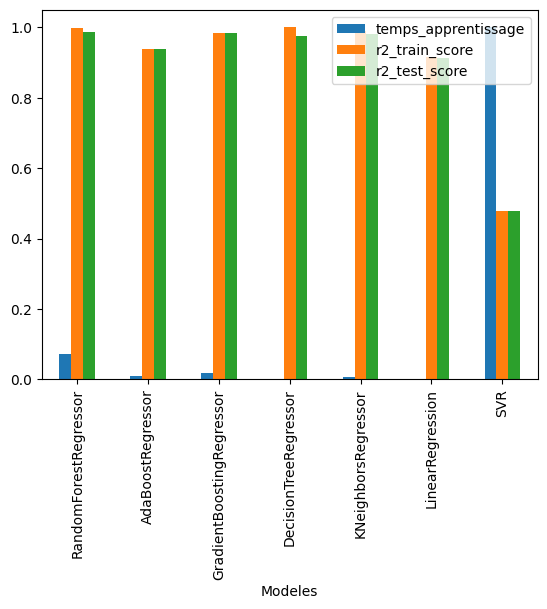

In [67]:
#visualisation
scores.plot.bar()

## **Entrainement par validation croisée**

In [61]:
#importation de la fonction de validation croisée
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [62]:
#Définition de fonction de validation croisee
def crossValidation(ModelsList , X_train_scaled , y_train):
  scores = []
  for mod in ModelsList :
    try :
      model = mod(random_state = 42) #instanciation avec random_state
    except TypeError :
      model = mod() #instanciation sans random_state
    debut = time() #calcul du temps de début
    score = cross_validate(estimator = model , X = X_train_scaled , y = y_train , cv = 5 ,
               scoring = 'r2', n_jobs = -1 , return_train_score = True)  #entrainement
    fin = time() #calcul du temps de fin
    scores.append({"Modeles" : type(model).__name__ ,
                   "temps_apprentissage" : fin - debut,
                   "r2_train_score" : score['train_score'].mean() ,
                   "r2_test_score" : score['test_score'].mean()})
  return pd.DataFrame(scores)

In [63]:
#entrainement par validation croisée
scores = crossValidation(ModelsList ,X_train_scaled, y_train)
scores.set_index("Modeles" , inplace = True)
scores

,temps_apprentissage,r2_train_score,r2_test_score
Modeles,,,
RandomForestRegressor,48.564384,0.998236,0.987219
AdaBoostRegressor,7.317404,0.939385,0.938852
GradientBoostingRegressor,12.847080,0.984354,0.983144
DecisionTreeRegressor,0.756581,0.999994,0.975956
KNeighborsRegressor,4.108319,0.988806,0.982554
LinearRegression,0.251168,0.916635,0.913117
SVR,664.118327,0.479760,0.479659


In [64]:
#normalisation du temps_apprentissage
scores["temps_apprentissage"] = scores["temps_apprentissage"]/scores["temps_apprentissage"].max()
scores

,temps_apprentissage,r2_train_score,r2_test_score
Modeles,,,
RandomForestRegressor,0.073126,0.998236,0.987219
AdaBoostRegressor,0.011018,0.939385,0.938852
GradientBoostingRegressor,0.019345,0.984354,0.983144
DecisionTreeRegressor,0.001139,0.999994,0.975956
KNeighborsRegressor,0.006186,0.988806,0.982554
LinearRegression,0.000378,0.916635,0.913117
SVR,1.000000,0.479760,0.479659


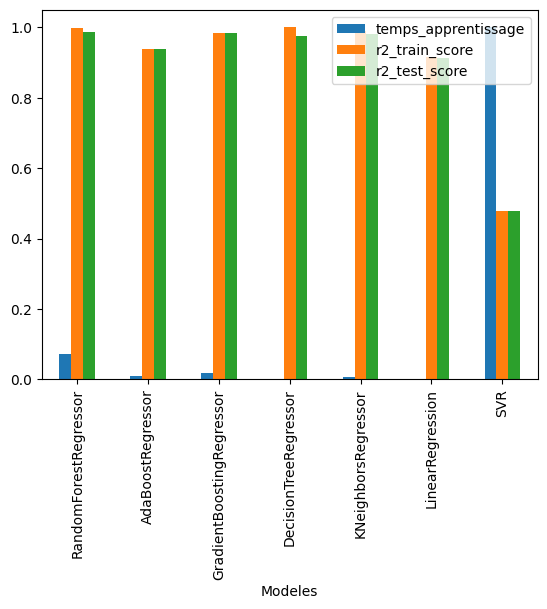

In [65]:
#visualisation
scores.plot.bar()
plt.show()

L'algorithme des K-Voisins les plus proches (KNeighborsRegressor) reste le meilleur algorithme pour les deux méthodes d'entrainement car ayant un très bon sens de généralisation et le meilleur temps d'éxecution.

## **Optimisation**

In [72]:
#optimisation suivant l'hyperparamètre n_neighbors (le nombre de voisins)
scoresKnn = []
k_range = range(1 , 21)
for k in k_range :
  model = KNeighborsRegressor(n_neighbors = k)
  model.fit(X_train_scaled , y_train)
  y_pred_train = model.predict(X_train_scaled) #calcul des prédictions par rapport aux données d'entrainement
  y_pred_test = model.predict(X_test_scaled) #calcul des prédictions par rapport aux données de test
  scoresKnn.append({"Modeles" : f"{str(type(model).__name__) + str(k)}" ,
                   "r2_train_score" : r2_score(y_train , y_pred_train) ,
                   "r2_test_score" : r2_score(y_test , y_pred_test)})
pd.DataFrame(scoresKnn)

,Modeles,r2_train_score,r2_test_score
0,KNeighborsRegressor1,0.999985,0.976892
1,KNeighborsRegressor2,0.994336,0.981757
2,KNeighborsRegressor3,0.991835,0.983027
3,KNeighborsRegressor4,0.990305,0.983528
4,KNeighborsRegressor5,0.989283,0.983710
5,KNeighborsRegressor6,0.988556,0.983582
6,KNeighborsRegressor7,0.987893,0.983386
7,KNeighborsRegressor8,0.987340,0.983080
8,KNeighborsRegressor9,0.986714,0.982823
9,KNeighborsRegressor10,0.986132,0.982480


## **Modèle final**

In [73]:
#instanciation
finalModel = KNeighborsRegressor(n_neighbors = 5)
#entrainement
finalModel.fit(X_train_scaled , y_train )

KNeighborsRegressor()

In [74]:
#Score d'entrainement
finalModel.score(X_train_scaled , y_train)

0.9892829267247453

In [75]:
#Score de test
finalModel.score(X_test_scaled , y_test)

0.9837096878529471

Le modèle a un pouvoir explicatif de 98%

# **Déploiement**

In [76]:
#importation de module permettant de sauvegarder nos modeles, nos transformateurs
import pickle

In [82]:
#sauvegarde de notre modele sous forme de fichier
pickle.dump(finalModel , open("model.pkl" , "wb") )

In [84]:
#sauvegarde du normaliseur
pickle.dump(scaler , open("scaler.pkl" , "wb") )